# UCI Machine Learning Repository: Wine Data Set (Octave)

My first project after completing Andrew Ng's ML course on coursera. Consequently, my approach is guided by the ideas and techniques covered there. The data set is from UCI's Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine).

NOTE: The code is in Octave!
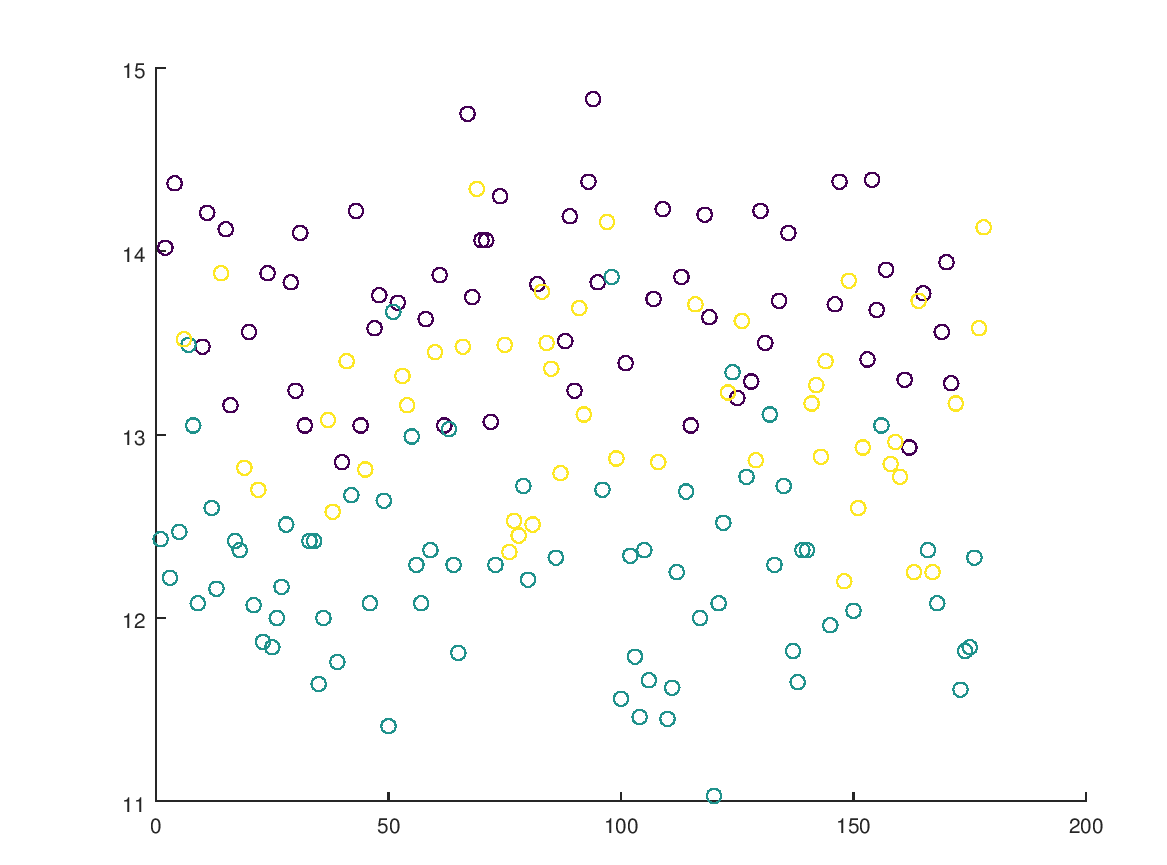
## What's it about?

From the UCI page:
"These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

We have three classes, thirteen features, and 178 examples. Those are the features:

 1) Alcohol
 2) Malic acid
 3) Ash
 4) Alcalinity of ash
 5) Magnesium
 6) Total phenols
 7) Flavanoids
 8) Nonflavanoid phenols
 9) Proanthocyanins
 10) Color intensity
 11) Hue
 12) OD280/OD315 of diluted wines
 13) Proline
 
And the class distribution:

Class 1: 59 examples, Class 2: 71, Class 3: 48.
 
Our goal is to predict from which cultivar (class) a given example is from, i.e. we have a classification problem.
 
 Let's get started!
 
 ## 1. Loading and initializing the data set

In [ ]:
clear; close all; clc;

format short g;  # this shows numbers as decimals instead of exponential numbers (i.e. 0.000.... instead of 1e-6)
load wine.data.txt
data = wine_data;
l = length(data);

As a first step, we print out the classes (first column of the data) to see if they're ordered.

In [ ]:
data(:, 1)

ans =

           1
           1
           1
           1
           1
           1
           1
           1
           1
           1
           1
           1
           1
           1
           ...

We see that the data are ordered by class, so we need to reshuffle them. An added benefit is that it reshuffles the data every time you re-run the algorithm, so over time you get a more robust idea of its performance.

In [ ]:
rndIDX = randperm(l); 
data = data(rndIDX, :);

Next, we define X, y and the number of features for later use:

In [ ]:
X = data(:, 2:end);
y = data(:, 1);
num_features = size(X, 2);

## 2. Inspecting the data

Before working the data, we want to get an impression of it. Let's take a look at the first rows as well as at the means and standard deviations.

In [ ]:
# let's inspect the dataset
fprintf("Data size: \n")
size(data)
fprintf("\nFirst 10 rows: \n")
data(1:10, :)
fprintf("\nMeans: \n")
mean(X)
fprintf("\nStandard deviations: \n")
std(X)
fprintf("\nPress Enter to continue. \n")
pause;

(add data)

We see that the data is now randomly ordered. Also, the features have different scales, so depending on the algorithm we want to use we have to scale them.

The next step is to create some scatterplots to see how the examples are distributed for the different features:

In [ ]:
range = linspace(1, l, l);
scatter(range, X(:,1), 50, y) #X(:,1) is the first feature, X(:,2) the second etc. You can also use a loop

This is how the plots look like:

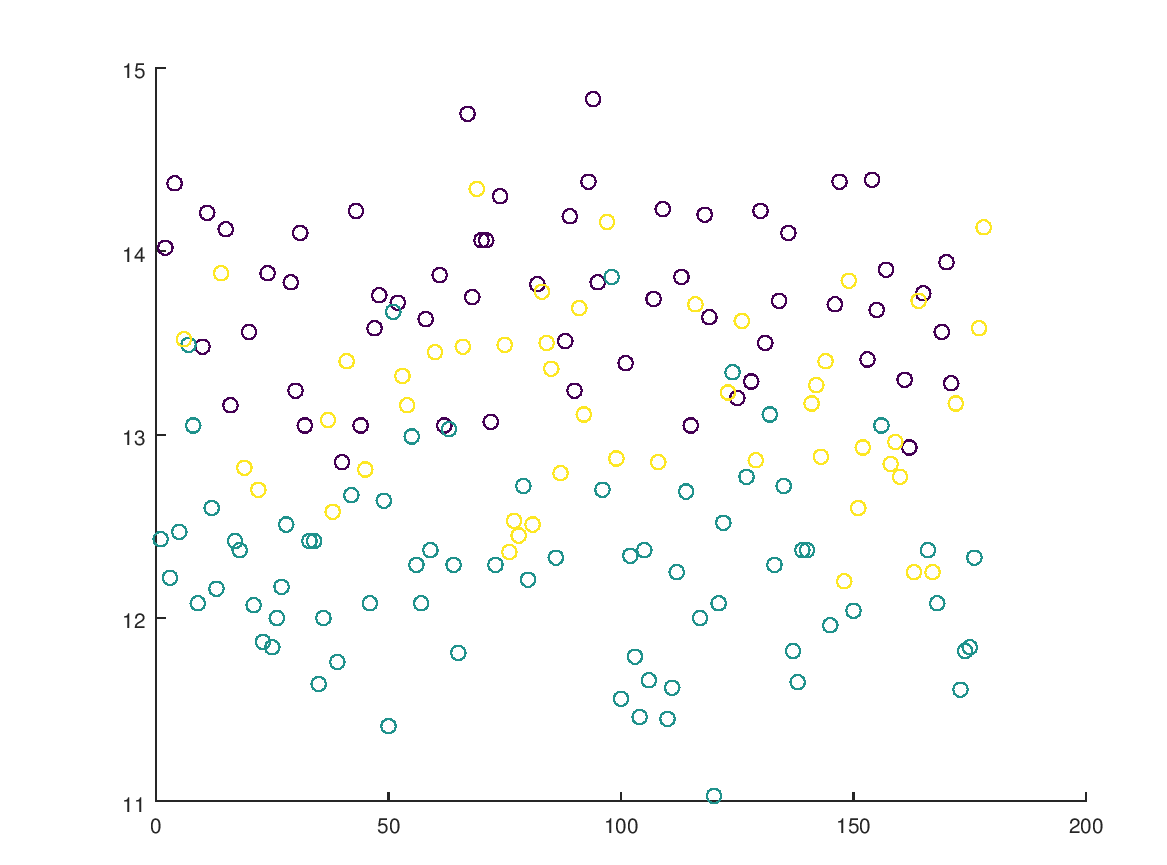
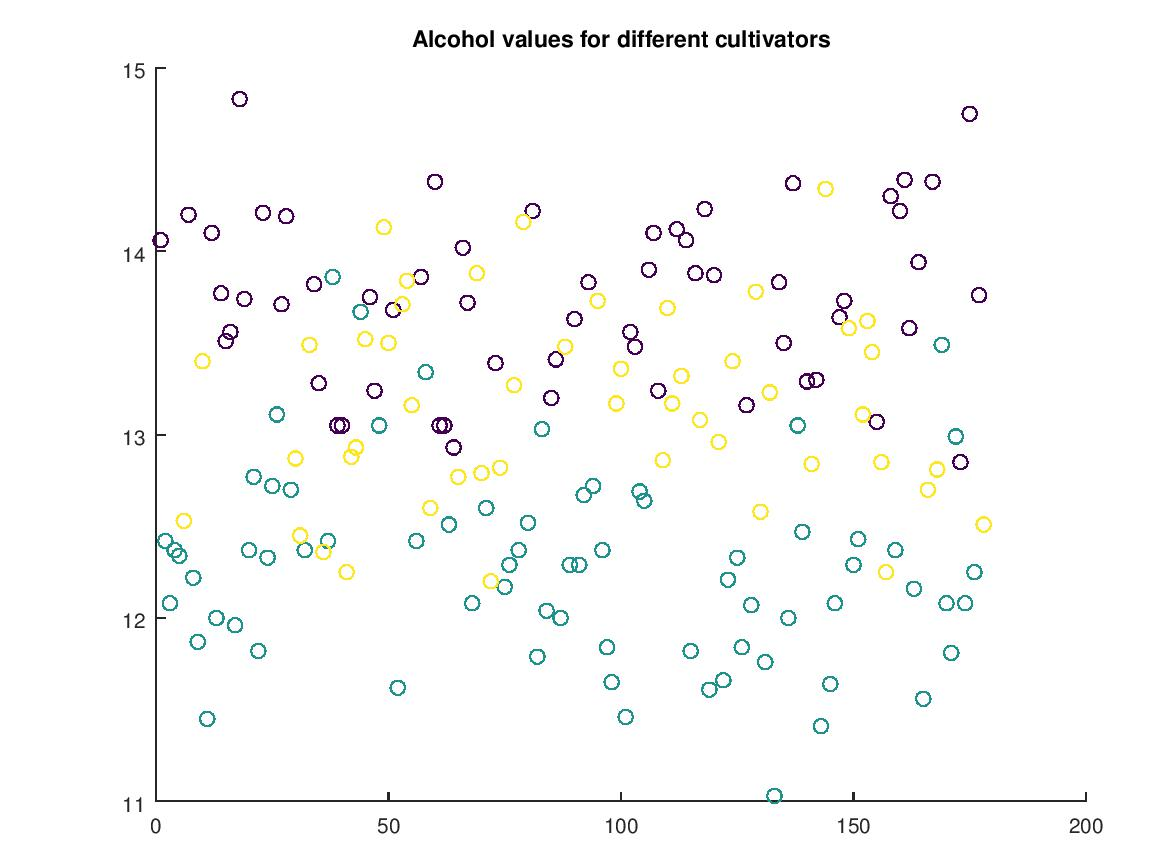
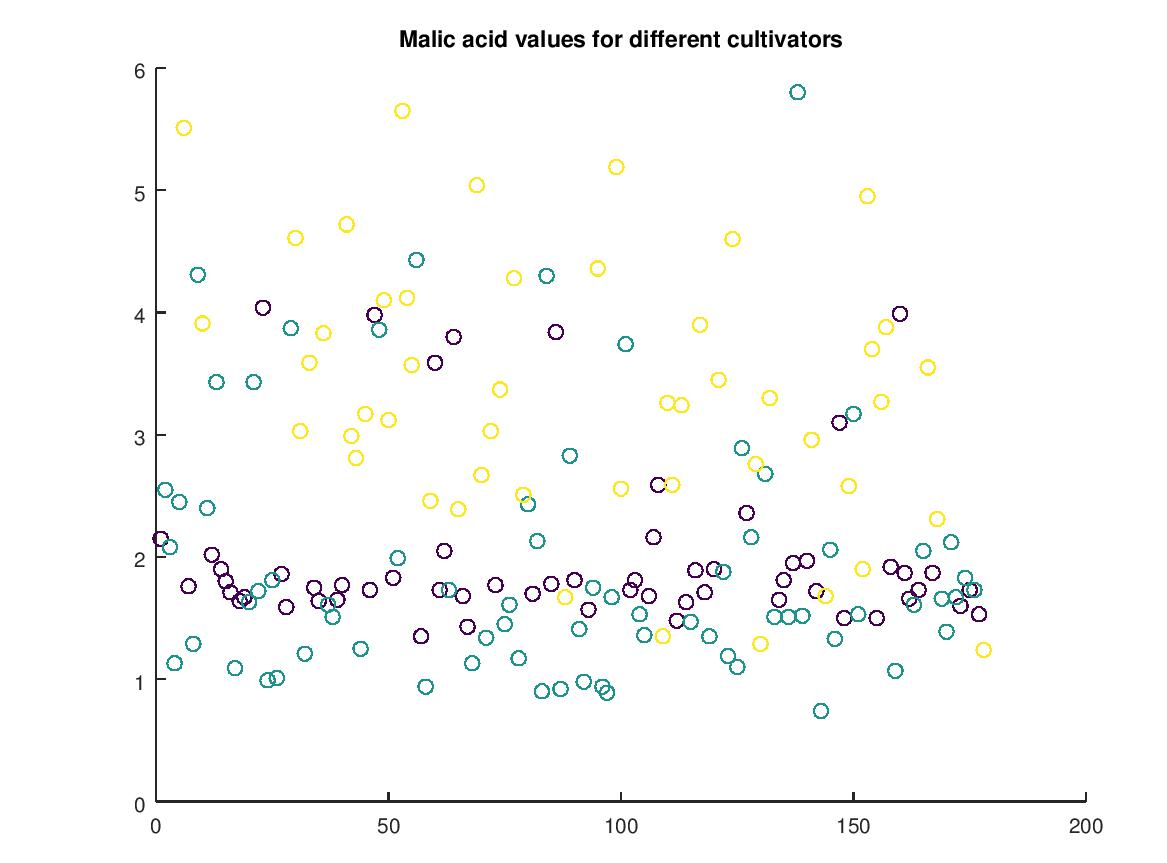
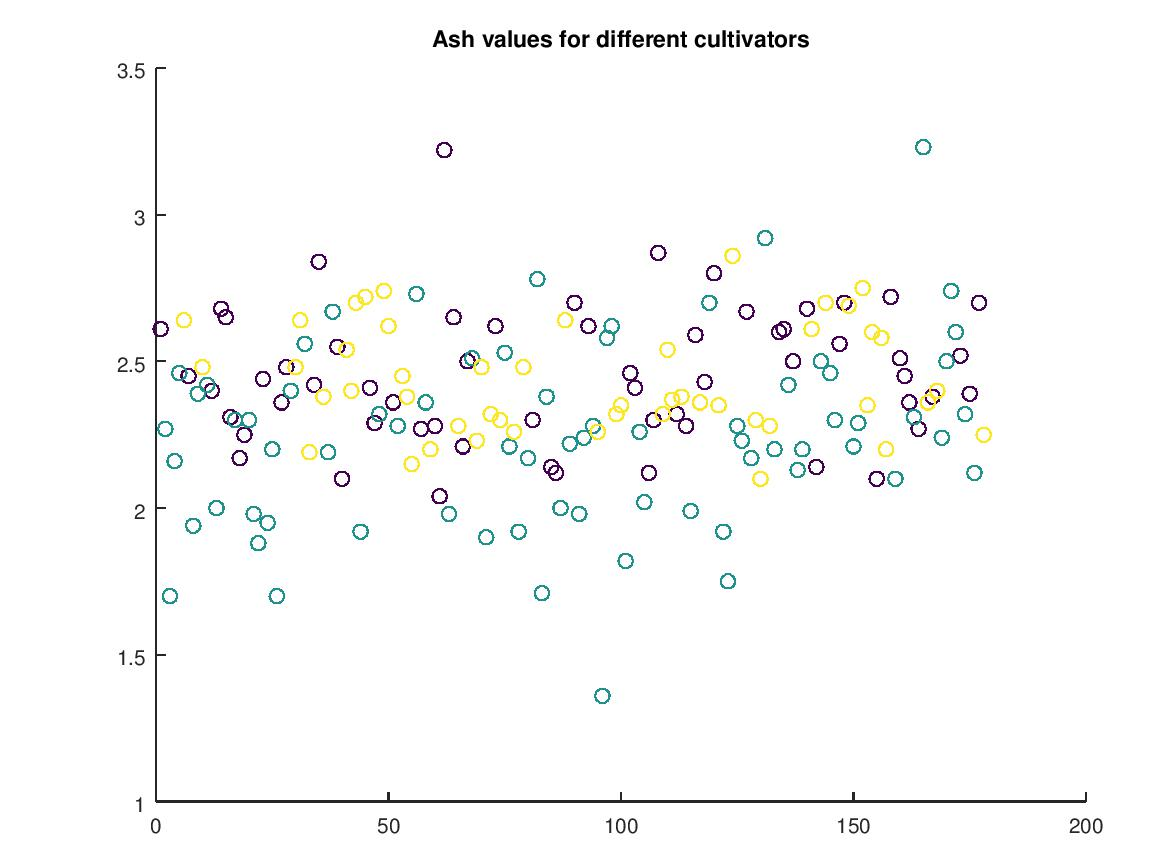
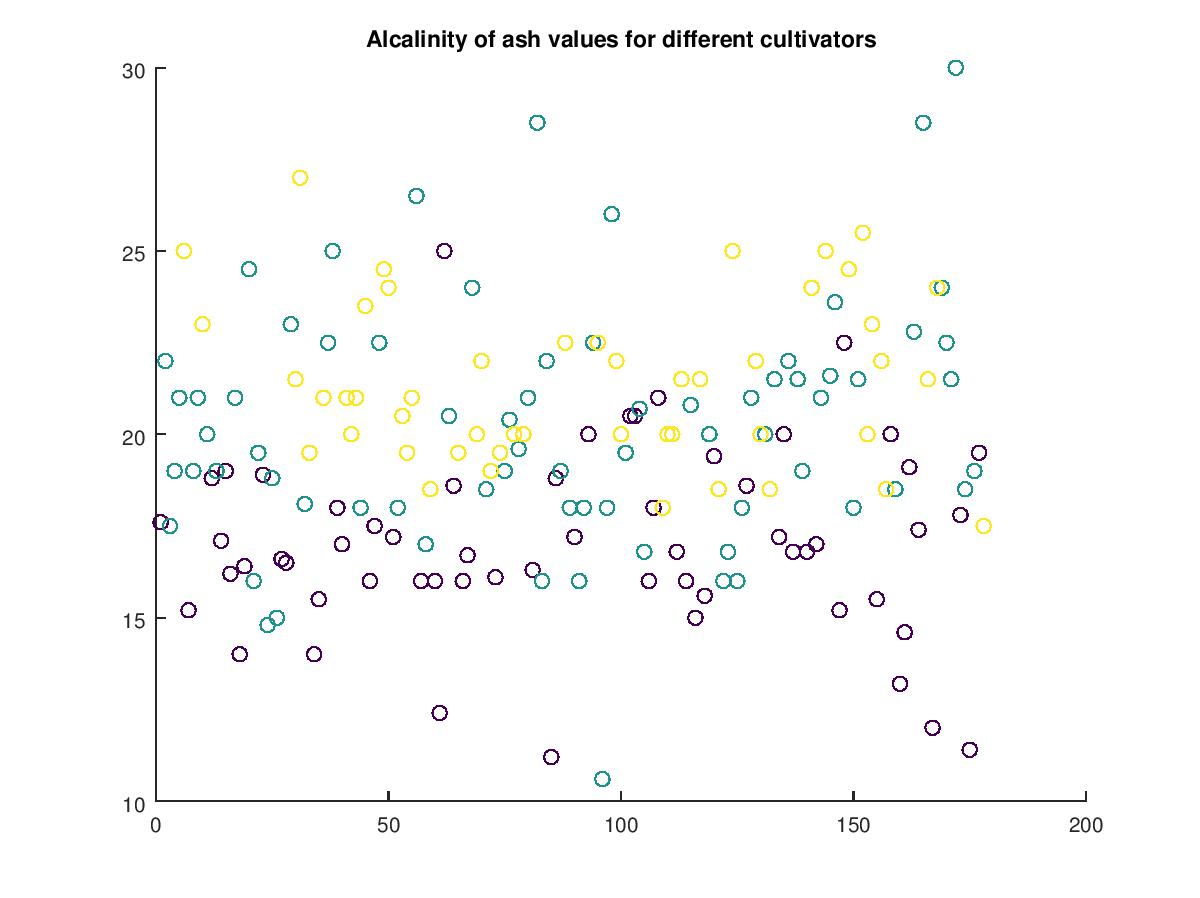
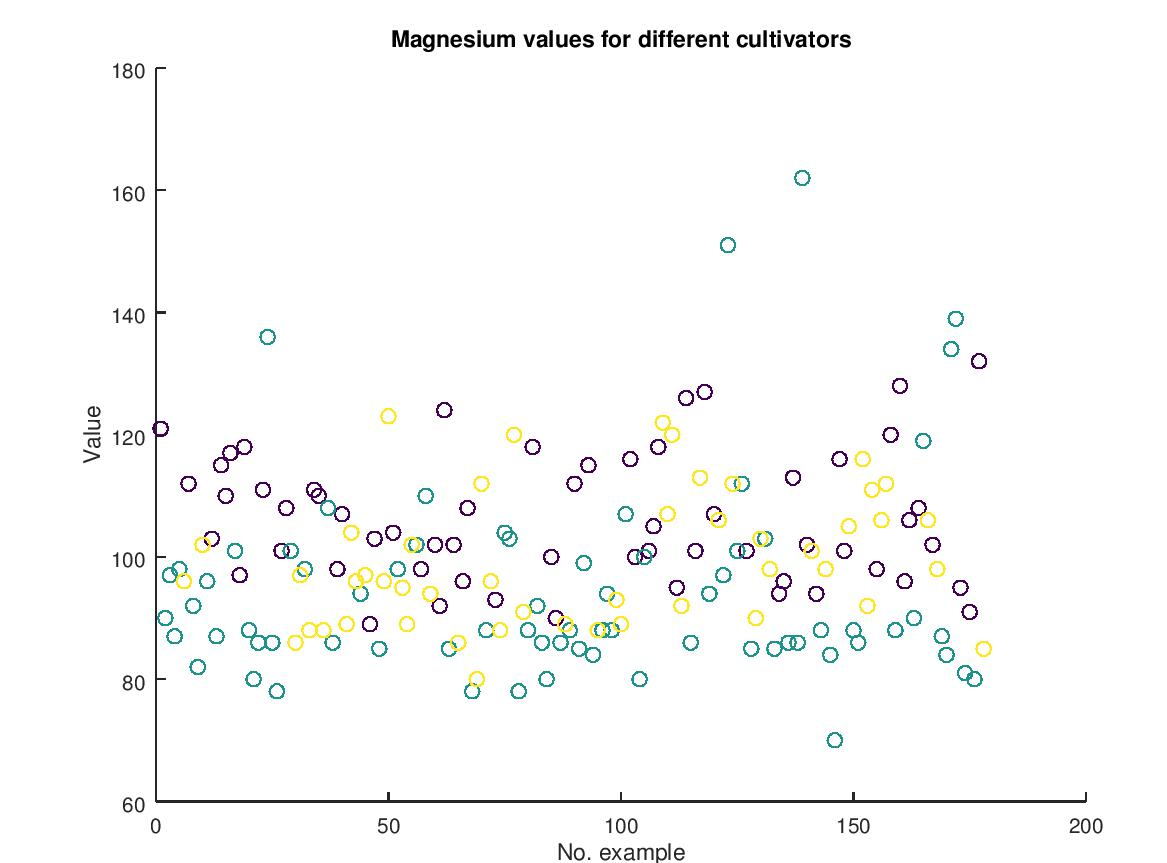
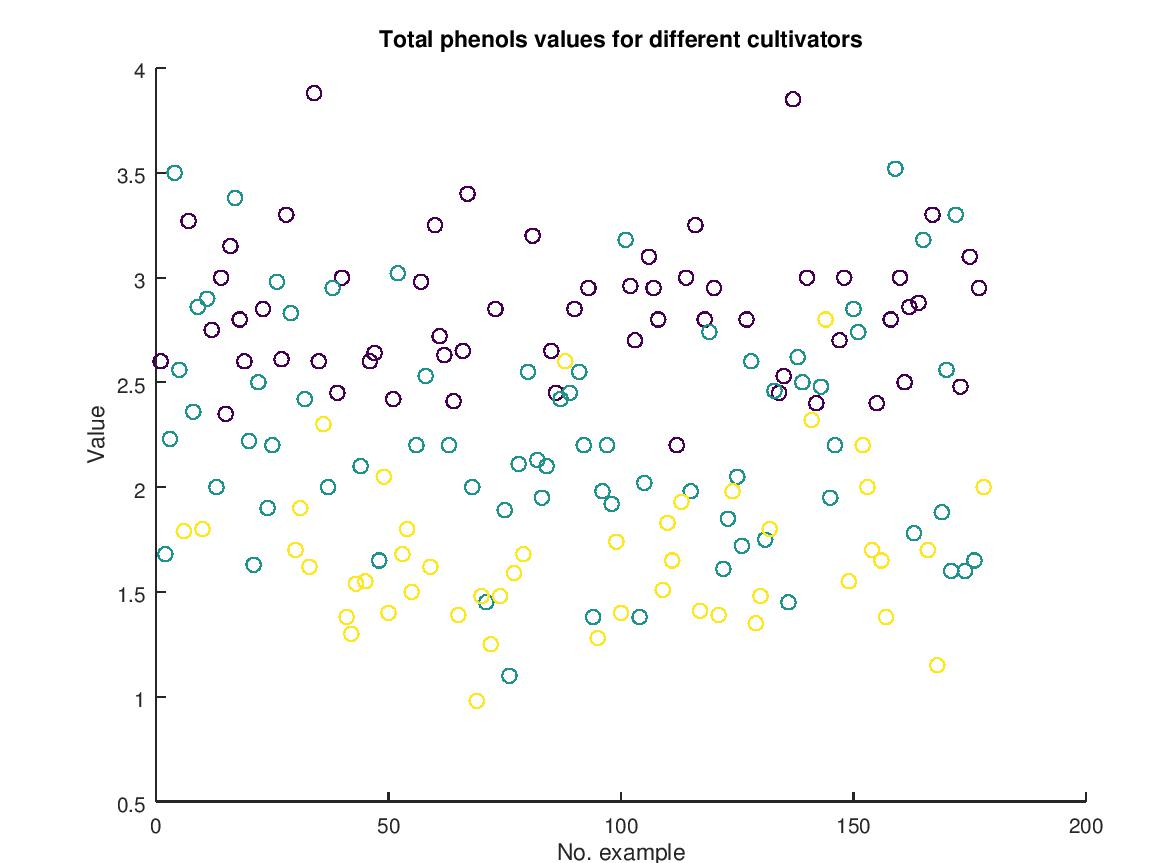
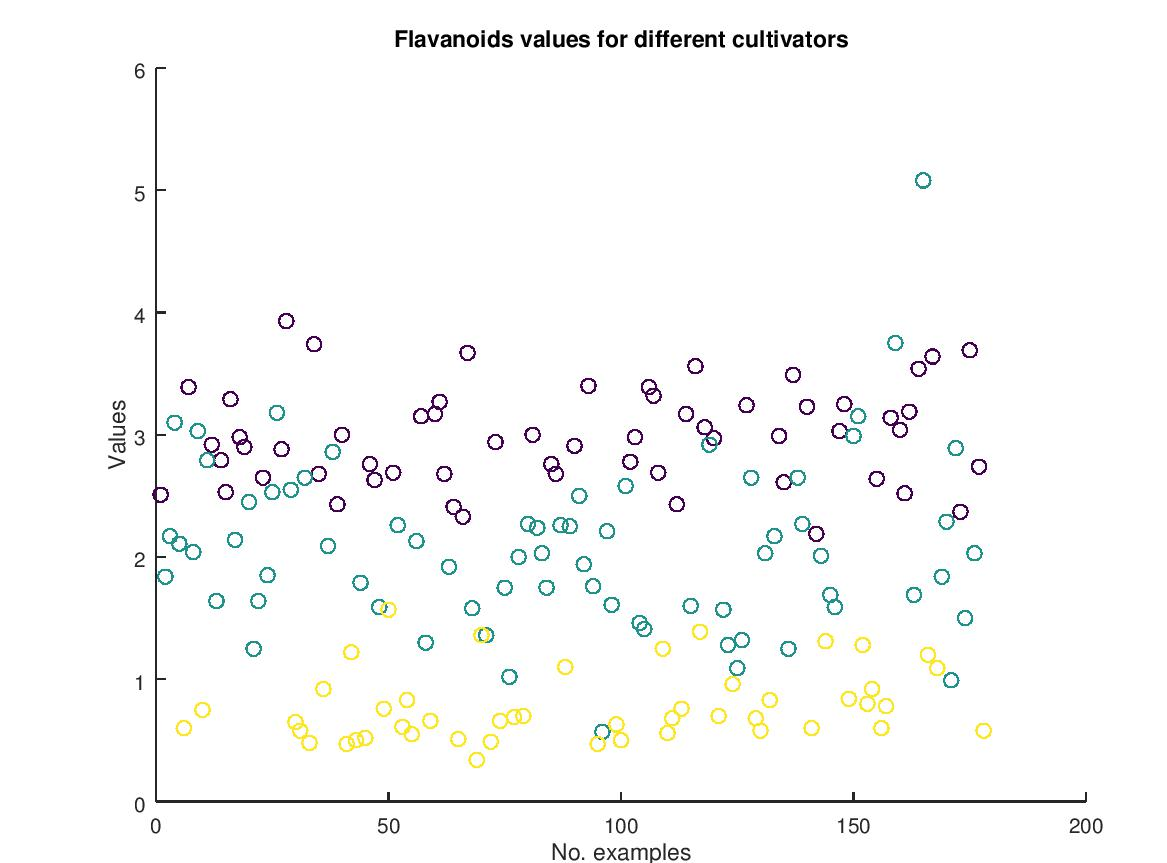


We can see that for many features (e.g. Flavanoids and Phenols), there are "clusters" formed by the different locations - there is systematic variance between the different classes. This is good news: With those differences between classes, a learner should not have any difficulties in becoming very accurate.

With this in mind, we can proceed to train our algorithm! We've already reshuffled the data set. Now we bring all features to the same scale and split the data into training, validation, and test set.

## 3. Setting up training, validation, and test sets


In [ ]:
# the features have different scales, so we want to normalize them
# featureNormalize calculates means & standard deviations and scales each feature so that mean = 0, std = 1.
# The code is in the folder
[X_norm, mu, sigma] = featureNormalize(X);

# we also replace X with X_norm
X = X_norm;
% Add a column of ones to x (intercept term)
X = [ones(l, 1), X];

# defining the training set (~60% of sample)
XTrain = X(1:108, :);
yTrain = y(1:108, :);
m = length(XTrain);
# cross-validation set (~20% of sample)
XVal = X(109:143, :);
yVal = y(109:143, :);
n = length(XVal);
# test set (~20% of sample)
XTest = X(144:end, :);
yTest = y(144:end, :);
o = length(XTest);

## 4. Setting up the parameters - choosing the learner

In his coursera class, Andrew Ng advises to always start with a "quick and dirty" algorithm to get an idea about the things that will determine what to work on further: How accurate is the learner? Is there high bias or high variance? Is the cost descending with more iterations?

Therefore, we'll start with a simple logistic regression. We have to predict each class separately, with y=1 when the class is true and y=0 when the other classes are true. So we actually train three learners.

In [ ]:
# we will train three classifiers. Therefore, we need three thetas
theta_one = zeros(size(X,2), 1);
theta_two = zeros(size(X,2), 1); 
theta_three = zeros(size(X,2), 1);

# you could also put the next few lines in the cost function, but I prefer to leave it in the main script:

# this step will return a binary vector for each winery, with 1 if the class/winery is true and 0 if not
# it allows us to train a logReg algorithm for each SK separately
y_one = yTrain == 1;
y_two = yTrain == 2;
y_three = yTrain == 3;

# same for yval
yVal_one = yVal == 1;
yVal_two= yVal == 2;
yVal_three = yVal == 3;

In the next step we set lambda and call the cost functions. As a start I set lambda to 1. 

In [ ]:
# setting lambda
# if necessary, we can set different lambdas for the different classes
lambda = 1;


# defining the cost functions for each class
[J_one, grad_one] = lrCostFunction(theta_one, XTrain, y_one, lambda);
[J_two, grad_two] = lrCostFunction(theta_two, XTrain, y_two, lambda);
[J_three, grad_three] = lrCostFunction(theta_three, XTrain, y_three, lambda);

## 5. Training the algorithm

Alright, time to learn:

In [ ]:
# I use the fminunc algorithm
% Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 1000);
initial_theta = zeros(size(X,2), 1);

% Run fminunc to obtain the optimal theta
% This function will return theta and the cost for each theta
[theta_one, cost_one] = ...
fminunc(@(t)(lrCostFunction(t, XTrain, y_one, lambda)), initial_theta, options);
[theta_two, cost_two] = ...
fminunc(@(t)(lrCostFunction(t, XTrain, y_two, lambda)), initial_theta, options);
[theta_three, cost_three] = ...
fminunc(@(t)(lrCostFunction(t, XTrain, y_three, lambda)), initial_theta, options);


# we also want to keep the parameters to inspect them
theta = [theta_one theta_two theta_three];

To get a first impression of the results we print the thetas and the costs of the three learners.

In [ ]:
# printing the thetas gives us an idea of how the different features are related to the
# different classes
fprintf("Parameters: \n")
theta

fprintf("Press Enter to continue. \n")
pause;

# lets also see the costs at the end of the training
fprintf("Costs for the training set: \n")
cost_one
cost_two
cost_three

And we get the results:

In [ ]:
theta =

     -1.7237     -1.4759     -3.0199
      1.2028     -1.4288     0.42278
     0.11032     -0.4326     0.50957
      1.0943     -1.0148     0.24107
     -1.2839     0.66659     0.23025
   -0.058025    0.046484   -0.022954
     0.32387     0.26197    -0.53554
     0.99897     0.32284     -1.1591
    -0.24578     0.08592     0.34017
  -0.0018193    0.033399    -0.63712
    0.072398     -1.7596      1.1497
       0.199     0.90641      -1.009
     0.86185   -0.071956    -0.91172
      1.4149     -1.5651   -0.035918

Press Enter to continue.
Costs for the training set:
cost_one =   0.075485
cost_two =    0.11022
cost_three =   0.048113

We can seet that the costs are already pretty low. That's a good sign unless we're seriously overfitting our training set. Well, we're about to find out!

## 6. Evaluating the algorithm

A nice way to get a better idea about the learner's performance is to plot a learning curve. For this curve, we start training a learner with just one example and measure the error for the training and the validation set. Then we take two examples and do the same, up until we train it with the whole test set. The curve will show us if the errors drop as the training set gets bigger. It'll also show the difference between training and test set errors and their development - this allows us to judge the bias and variance of the algorithm.

For lambda = 1, those are the learning curves:

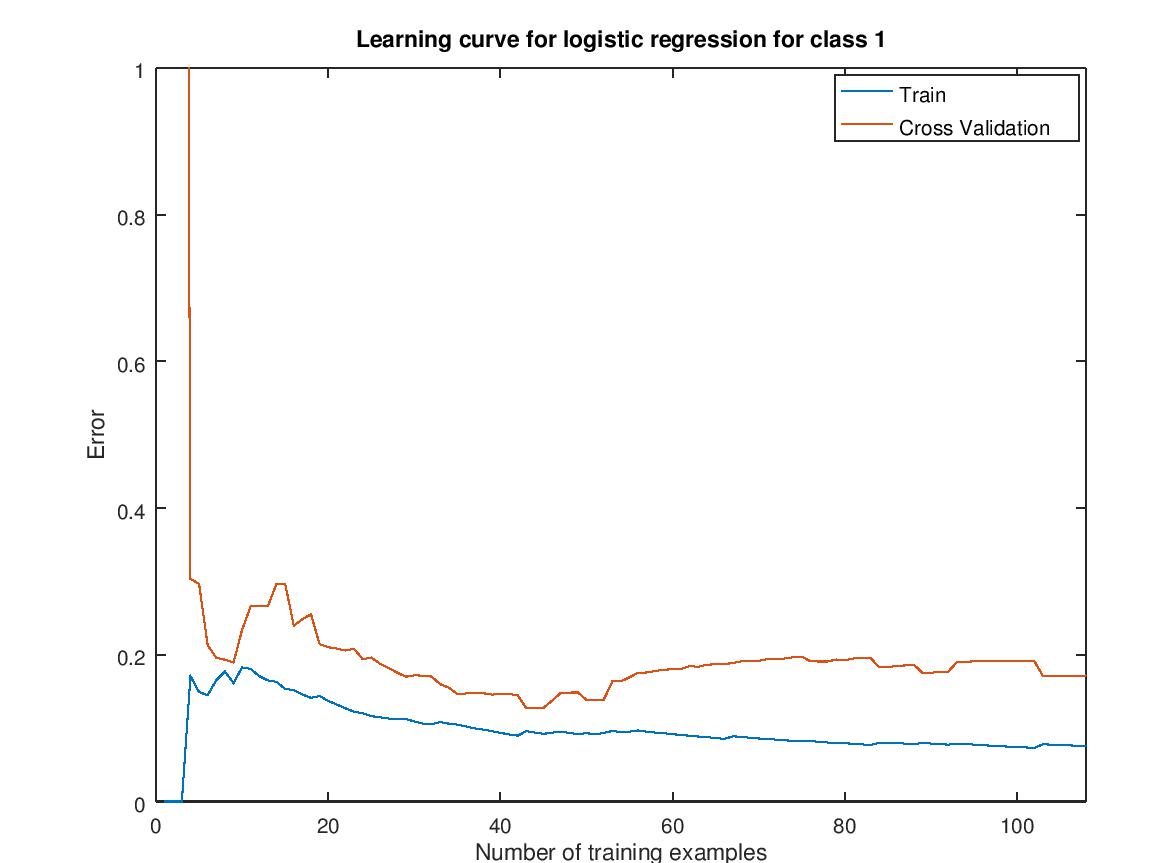
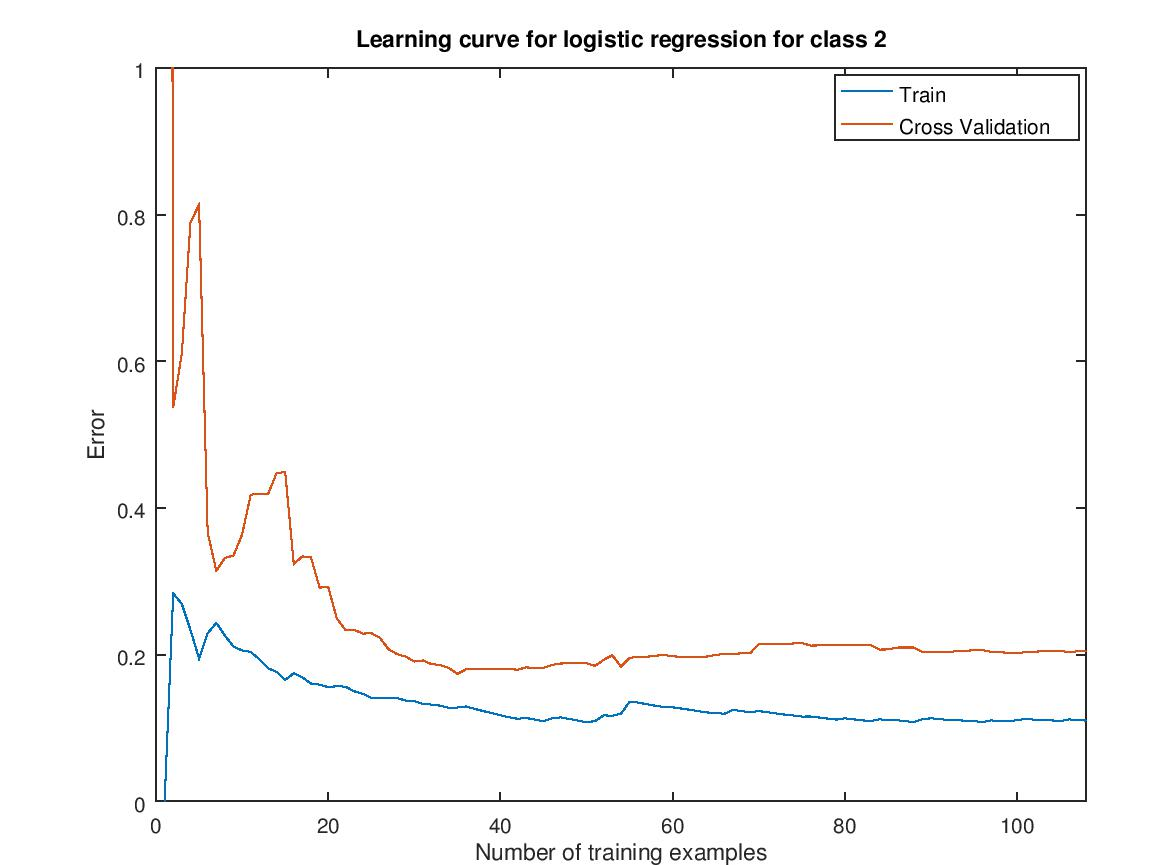
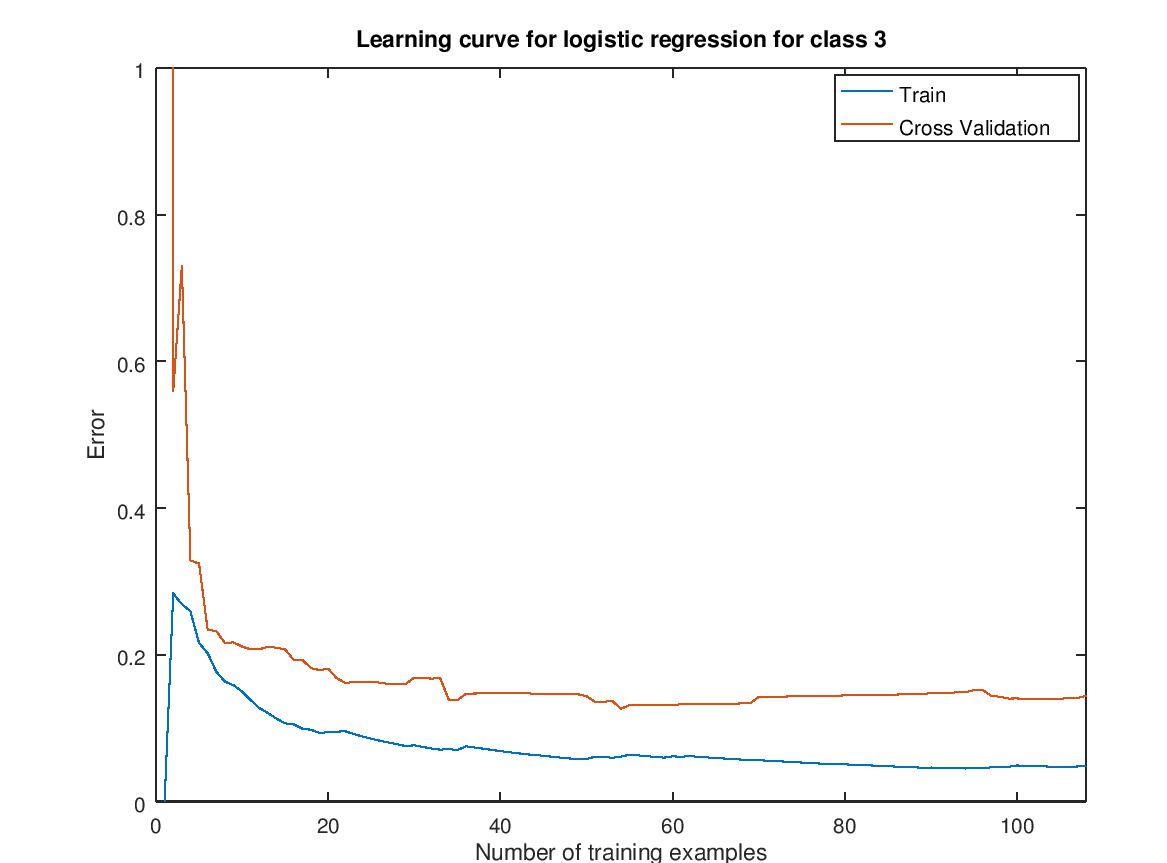

What does this tell us? The cost for both sets is fairly low. However, the differences between training and validation sets indicate overfitting. Furthermore, the error stops to decrease after 40-60 examples. So we could also have high bias and underfit our training data. Let's continue to investigate this.

One parameter we can adjust very easily is lambda. We can compare performance on the training and validation sets for different values. This will allow us to see if we're really overfitting the training data: In this case, a higher lambda should lead lower error on the validation set.

In [ ]:
[lambda_vec, error_train_one, error_train_two, error_train_three, ...
          error_val_one, error_val_two, error_val_three] =  validationCurve(XTrain, yTrain, XVal, yVal);

And we plot it:

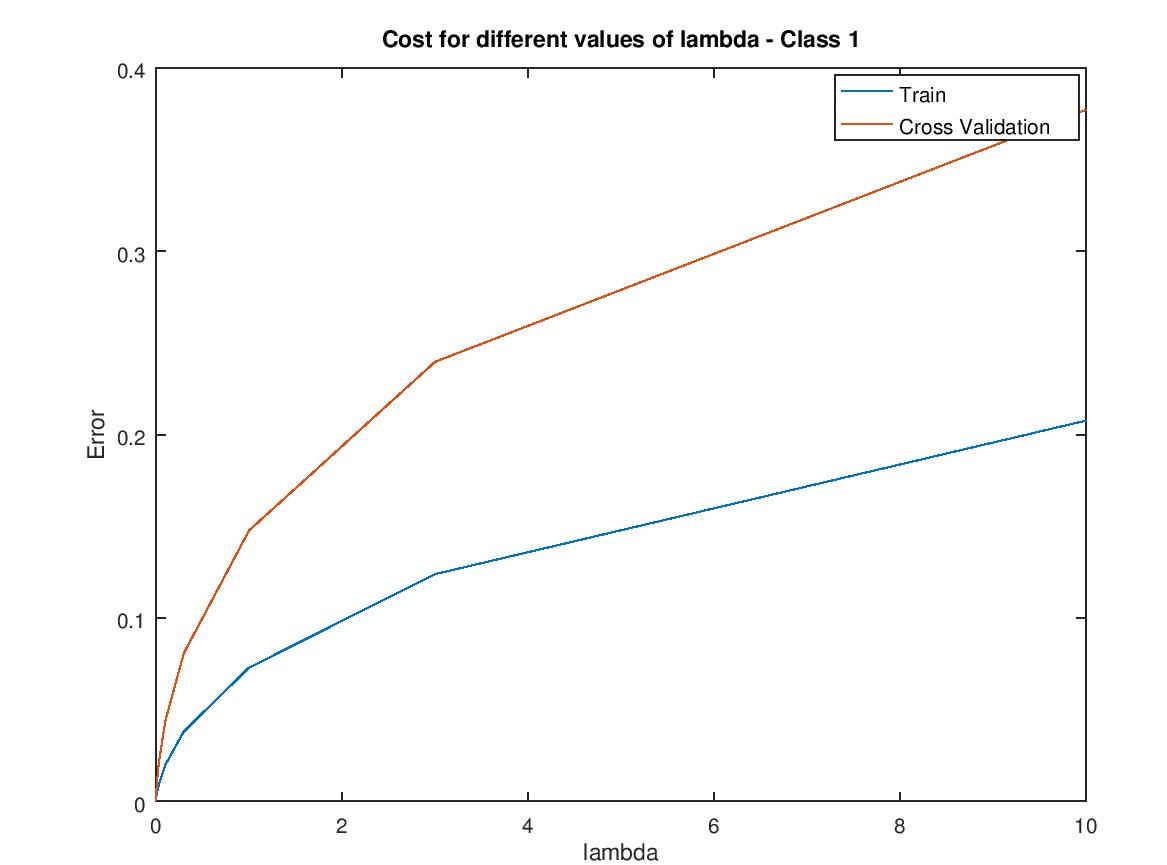
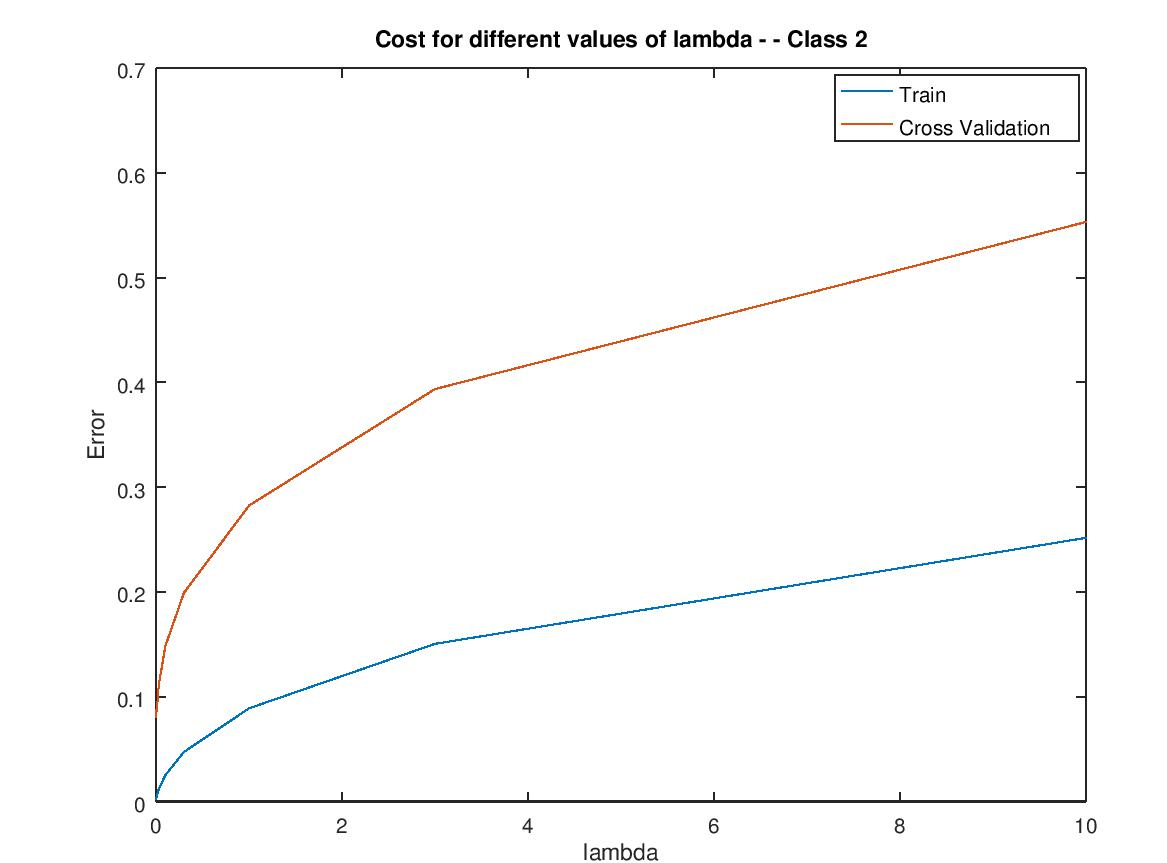
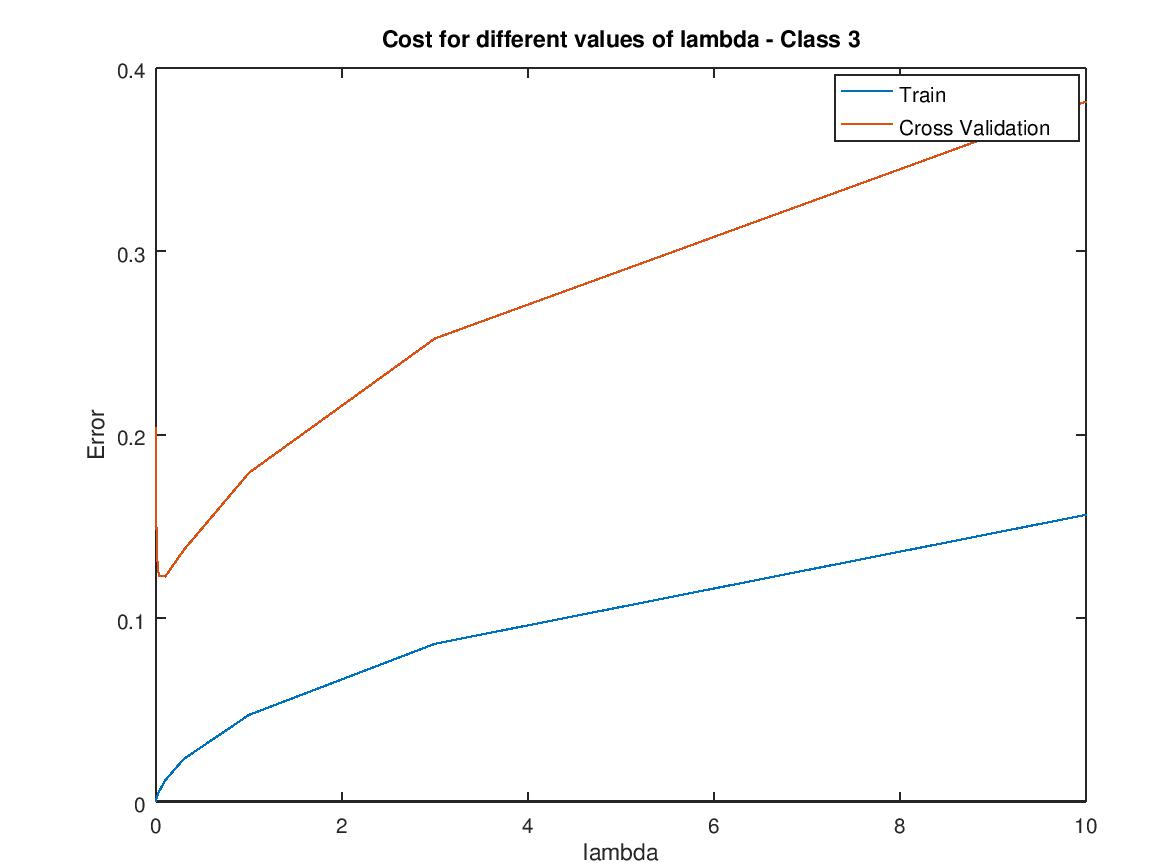


The plots show that for all learners, a lambda close ro equal to zero would lead to the smallest error! While we will still overfit the training data, we will underfit training and validation set with higher lambdas!

## 7. Running the algorithm with (almost) no regularization

We will train the learner again, but with lambda = 0.01. Those are the results: 

In [ ]:
theta =

     -4.4261     -3.9377     -7.4192
      2.8507     -4.1419      1.5145
      1.4751    -0.95095     0.63745
       1.771     -4.5732      3.1324
     -3.4651      3.3024  -0.0095732
      0.2498    -0.22923     0.53593
     0.56979    -0.74084      0.8175
      1.9058      1.6677     -5.4752
    -0.82705      1.2502    -0.67747
     -0.7241      1.2882     -1.2522
     0.18916     -4.5637      2.0422
     0.70584      2.6196     -2.8687
      1.9754     0.77589     -2.9374
       4.487     -5.4983      0.3082

Press Enter to continue.
Costs for the training set:
cost_one =  0.0036292
cost_two =  0.0080645
cost_three =  0.0044789

Note how the parameters theta are markedly higher than with lambda = 1. Moreover, the training costs have sunk by one to two orders of magnitude, so we did indeed underfit with our first run.

This is also borne out by the learning curves:

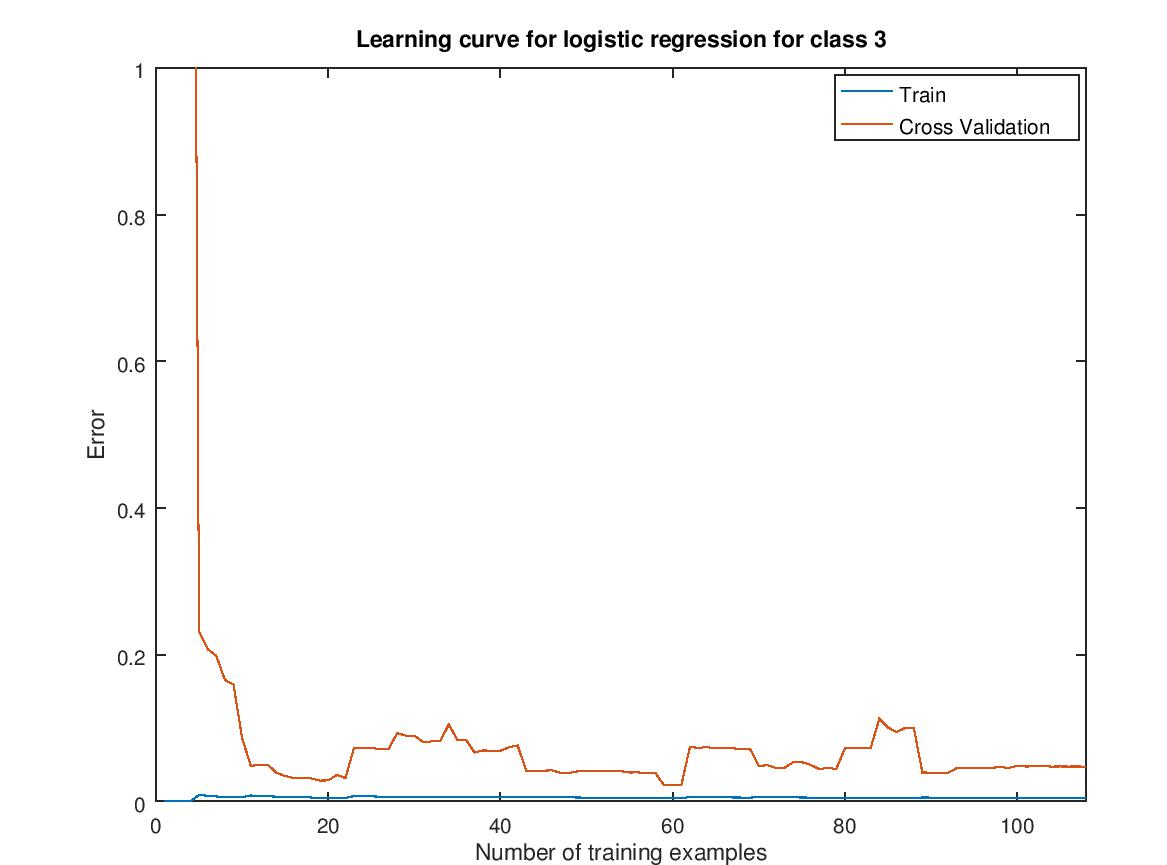
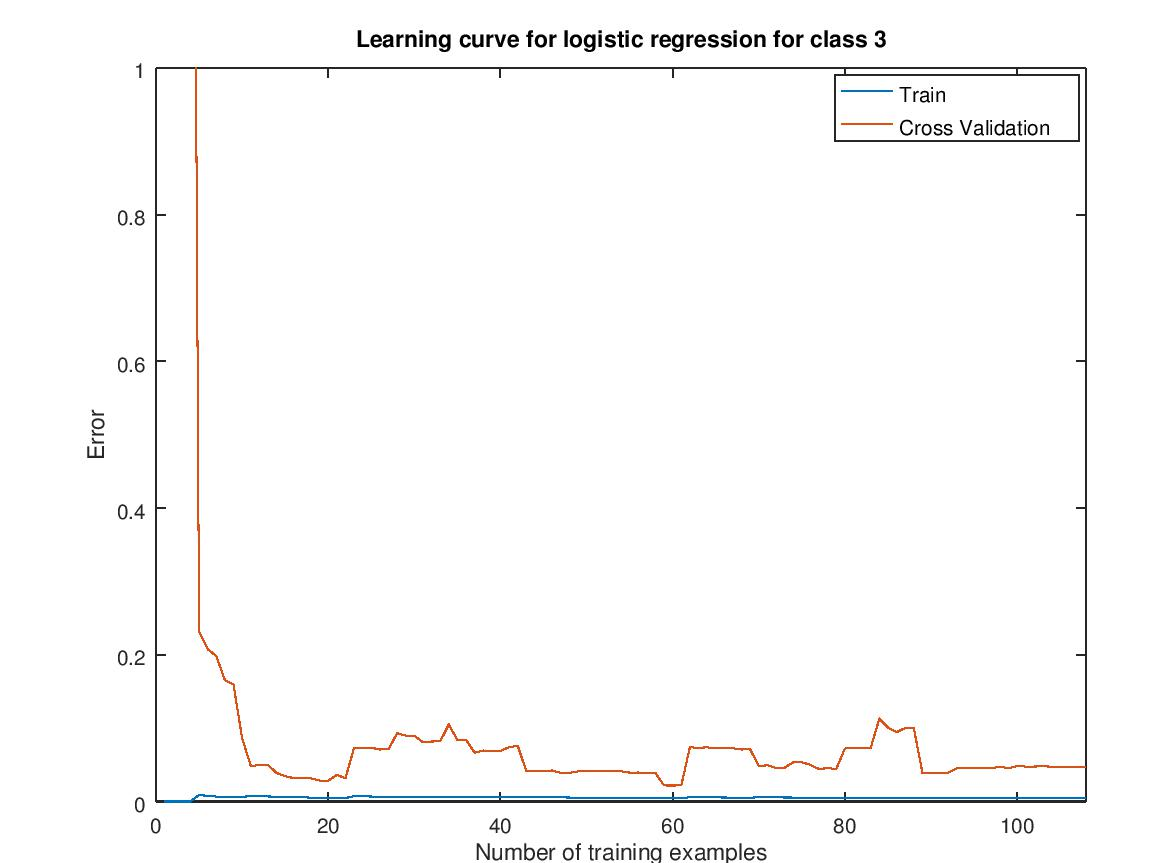
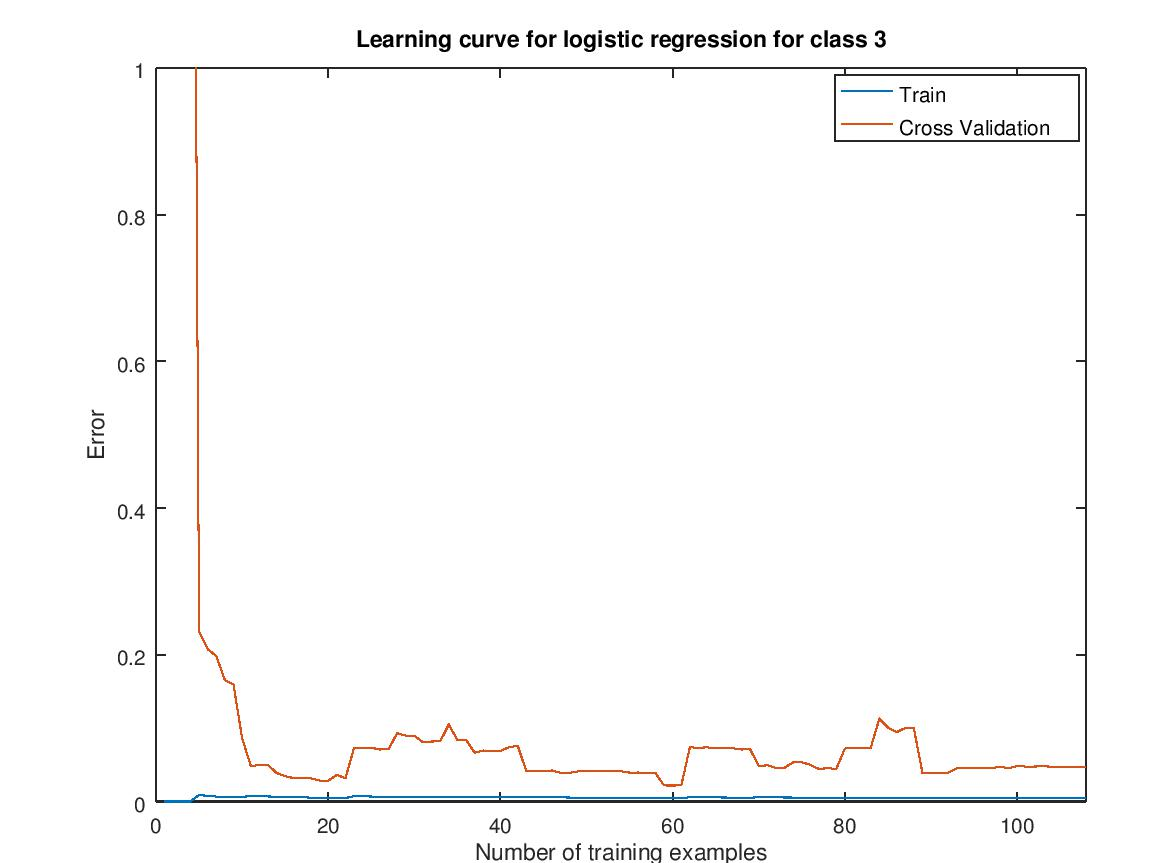

## 8. Predicting classes of new examples

We've trained the learners, now it's time to make predictions!

This function takes the validation set and lets, for each example, each learner assign probabilities of the example belonging to its class. The class with the highest probability is predicted.

In [ ]:
# predict makes a prediction for each example
[pVal, hypo] = predict(XVal, theta_one, theta_two, theta_three, yVal);

We compare the predictions with the actual classes. There are many ways to measure classification performance, such as true and false positives, precision, recall, F1, Area-under-curve etc. In his book "Machine Learning Yearning", Andrew Ng urges the use of a single-value metric. We heed his advice (for now) and start by measuring the overall accuracy:

In [ ]:
correctVal = sum(pVal == yVal);
accuracyVal = correctVal / length(yVal);

And we get as result:

accuracyVal =    0.97143

Since we have 35 examples in the validation set, that's 34 out of 35. Pretty good!

For the test set we get the same results:

accuracyTest =    0.97143

With those results, I don't think there's a need to delve deeper in to performance metrics. In the same vein, there's not much of a point to try other types of algorithms: This one does the job.